In [ ]:
!pip install gdown

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1oVZyTWhHShyqshC2kUrfWnBF8apIR7Z1'
output = 'val_rgb_front_clips.zip'  # Replace 'desired_filename.extension' with whatever name and extension the file should have.
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1oVZyTWhHShyqshC2kUrfWnBF8apIR7Z1
To: /content/val_rgb_front_clips.zip
100%|██████████| 1.78G/1.78G [00:24<00:00, 71.5MB/s]


'val_rgb_front_clips.zip'

In [ ]:
url2= 'https://drive.google.com/u/2/uc?id=1vJVV777_bmSeA2_k7iGdZu2izooeKUrq&export=download'
output = 'val_rgb_side_clips.zip'
gdown.download(url2, output, quiet=False)

Downloading...
From: https://drive.google.com/u/2/uc?id=1vJVV777_bmSeA2_k7iGdZu2izooeKUrq&export=download
To: /content/val_rgb_side_clips.zip
100%|██████████| 1.24G/1.24G [00:25<00:00, 48.2MB/s]


'val_rgb_side_clips.zip'

In [ ]:
url3 = 'https://drive.google.com/u/2/uc?id=1gKV_TloCbMyMhOdYvr_a-6I-PTf0Sjyi&export=download'
output = 'test_rgb_front_clips.zip'
gdown.download(url3, output, quiet=False)

In [ ]:
url4 = 'https://drive.google.com/u/2/uc?id=1quj8Ipm56pH65KAKK3Pc-sqZ0ozw2gSe&export=download'
output = 'test_rgb_side_clips.zip'
gdown.download(url4, output, quiet=False)

In [ ]:
!unzip test_rgb_side_clips.zip -d test_rgb_side_clips/
!unzip test_rgb_front_clips.zip -d test_rgb_front_clips/
!unzip val_rgb_side_clips.zip -d val_rgb_side_clips/
!unzip val_rgb_front_clips.zip -d val_rgb_front_clips/

In [ ]:
url5= 'https://drive.google.com/u/2/uc?id=12xVToQ2vm6pnXbgTyk2VqfnIxrMsORF1&export=download'
output_text = 'how2sign_val.txt'
gdown.download(url5, output_text, quiet=False)
url6= 'https://drive.google.com/u/2/uc?id=1B6WVb3Mtwof3mx3Pnf-UOOyXRpFaT9Hw&export=download'
output_text2 = 'how2sign_test.txt'
gdown.download(url6, output_text2, quiet=False)

In [ ]:
import pandas as pd
import cv2
import os
import re

txt_file_path = r"how2sign_val.txt"
txt_file_path2 = r'how2sign_test.txt'

def read_txt_to_df(file_path):
    with open(file_path, 'r') as txtfile:
        lines = txtfile.readlines()[1:]  # Skip the first row
    # Split each line by tabs and create a list of lists
    data = [line.strip().split('\t') for line in lines]
    # Create a DataFrame from the list of lists
    df = pd.DataFrame(data, columns=["VIDEO_ID", "VIDEO_NAME", "SENTENCE_ID", "SENTENCE_NAME", "START", "END", "SENTENCE"])
    return df

df1 = read_txt_to_df(txt_file_path)
df2 = read_txt_to_df(txt_file_path2)



In [ ]:
def clean(df):
  df['SENTENCE'] = df['SENTENCE'].str.replace('\t', '')
  df['SENTENCE'] = df['SENTENCE'].str.replace('\t', '')
  df['clip_side_id'] = df['SENTENCE_NAME'].str.replace('-rgb_front', '-rgb_side')

  # Drop the columns 'VIDEO_NAME'
  df = df.rename(columns={'SENTENCE_NAME': 'clip_front_id' })

  # Reorder columns
  df = df[['VIDEO_ID', 'clip_front_id', 'clip_side_id', 'START', 'END', 'SENTENCE']]
  return df
df1 = clean(df1)
df2 = clean(df2)

In [ ]:
# Directory paths
val_front_video_dir = "val_rgb_front_clips/raw_videos"
val_side_video_dir = "val_rgb_side_clips/raw_videos"
test_front_video_dir = "test_rgb_front_clips/raw_videos"
test_side_video_dir = "test_rgb_side_clips/raw_videos"

df1['path_front'] = val_front_video_dir + '/' + df1['clip_front_id']+ '.mp4'
df1['path_side'] = val_side_video_dir + '/' + df1['clip_side_id']+ '.mp4'
df2['path_front'] = test_front_video_dir + '/' + df2['clip_front_id']+ '.mp4'
df2['path_side'] = test_side_video_dir + '/' + df2['clip_side_id']+ '.mp4'

In [ ]:
df2.iloc[1].name

1

In [ ]:
import cv2
import numpy as np


def extract_frames(video_path, num_frames=90, target_size=(1280, 720)):
    """Extracts uniformly spaced frames from a video, resizes them, and returns as a list of image tensors."""
    frames = []

    # Open the video file
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    if not cap.isOpened():
        print(f"Failed to open video: {video_path}")
        return []

    # Frame indices to capture
    frame_idxs = [int(total_frames / num_frames * i) for i in range(num_frames)]

    for idx in range(total_frames):
        ret, frame = cap.read()
        if idx in frame_idxs:
            if ret:
                # Resize the frame to the target size
                frame = cv2.resize(frame, target_size)
                frames.append(frame)
            else:
                print(f"Failed to read frame at index {idx}")

    cap.release()
    return frames

In [ ]:
def process_row(row):
    front_video_path = row['path_front']
    side_video_path = row['path_side']

    front_frames = extract_frames(front_video_path)
    side_frames = extract_frames(side_video_path)

    row['images_front'] = front_frames
    row['images_side'] = side_frames
    print(row.name)

    return row

df1 = df1[:3].apply(process_row, axis=1)
# To apply it on the entire dataset cpmment the previous line and uncomment the next one
#df1 = df1.apply(process_row, axis=1)


0
1
2


In [ ]:
!pip install mediapipe opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 32.9 MB/s eta 0:00:00


In [ ]:
df1['hands_front'] = 0
df1['hands_side'] = 0

In [ ]:
df1['images_front'][0][0]

array([[[118, 168, 101],
        [118, 168, 101],
        [118, 167, 103],
        ...,
        [147, 190, 138],
        [147, 190, 138],
        [147, 190, 138]],

       [[119, 169, 102],
        [119, 169, 102],
        [119, 168, 104],
        ...,
        [147, 190, 138],
        [147, 190, 138],
        [147, 190, 138]],

       [[115, 170, 102],
        [115, 170, 102],
        [115, 168, 105],
        ...,
        [147, 190, 138],
        [147, 190, 138],
        [147, 190, 138]],

       ...,

       [[104, 155,  92],
        [103, 154,  91],
        [103, 154,  91],
        ...,
        [135, 188, 132],
        [135, 188, 132],
        [134, 187, 131]],

       [[102, 153,  90],
        [102, 153,  90],
        [102, 153,  90],
        ...,
        [135, 188, 132],
        [135, 188, 132],
        [134, 187, 131]],

       [[102, 153,  90],
        [102, 153,  90],
        [102, 153,  90],
        ...,
        [135, 188, 132],
        [135, 188, 132],
        [134, 187, 131]]

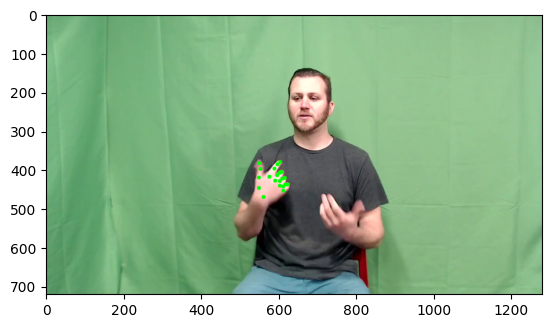

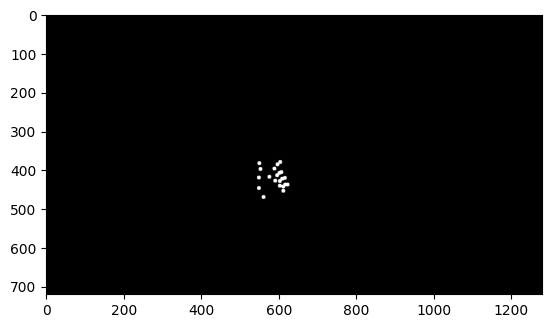

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = df1['images_front'][0][0]

# Initialize the hand tracking module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Perform hand detection
results = hands.process(image)

# Create a blank mask
mask = np.zeros_like(image)

# Draw hand landmarks and create mask
if results.multi_hand_landmarks:
    for landmarks in results.multi_hand_landmarks:
        for landmark in landmarks.landmark:
            x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.circle(mask, (x, y), 5, (255, 255, 255), -1)

# Store the hand mask in the 'hands' variable
hands = mask

# Display the original image with detected landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Display the hand mask
plt.imshow(hands, cmap='gray')
plt.show()


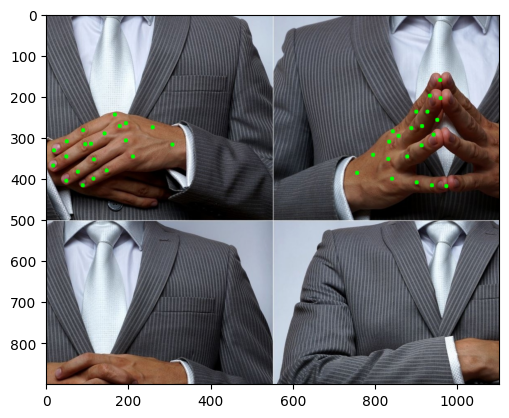

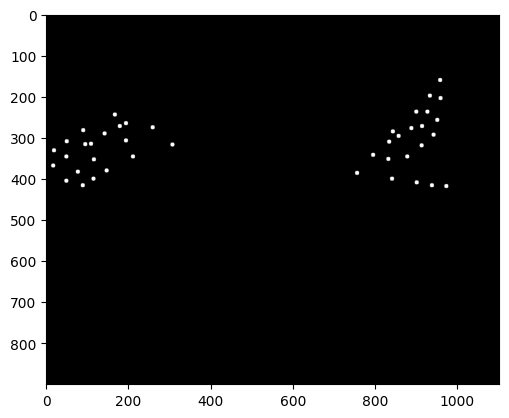

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

# Assuming you load your image here
image_path = '/content/Untitled-design-102-1104x900.jpg'
image = cv2.imread(image_path)

# Convert image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize the hand tracking module with parameters for better accuracy
mp_hands = mp.solutions.hands
hands_model = mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Perform hand detection
results = hands_model.process(image_rgb)

# Create a blank mask
mask = np.zeros_like(image)

# Draw hand landmarks and create mask
if results.multi_hand_landmarks:
    for landmarks in results.multi_hand_landmarks:
        for landmark in landmarks.landmark:
            x, y = int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.circle(mask, (x, y), 5, (255, 255, 255), -1)

# Display the original image with detected landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# Display the hand mask
plt.imshow(mask, cmap='gray')
plt.show()


In [ ]:
import cv2
import mediapipe as mp
import numpy as np

# Initialize the hand tracking module
mp_hands = mp.solutions.hands
hands = mp_hands.Hands()

# Function to generate hand masks for a row
def generate_hand_masks(row):
    front_hand_masks = []
    side_hand_masks = []

    # Process each preprocessed front image
    for image in row['images_front']:
        mask = np.zeros_like(image)
        results = hands.process(image)
        if results.multi_hand_landmarks:
            for landmarks in results.multi_hand_landmarks:
                landmark_positions = [(int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])) for landmark in landmarks.landmark]
                cv2.fillPoly(mask, [np.array(landmark_positions)], (255, 255, 255))
        front_hand_masks.append(mask)

    row['hands_front'] = front_hand_masks

    # Process each preprocessed side image
    for image in row['images_side']:
        mask = np.zeros_like(image)
        results = hands.process(image)
        if results.multi_hand_landmarks:
            for landmarks in results.multi_hand_landmarks:
                landmark_positions = [(int(landmark.x * image.shape[1]), int(landmark.y * image.shape[0])) for landmark in landmarks.landmark]
                cv2.fillPoly(mask, [np.array(landmark_positions)], (255, 255, 255))
        side_hand_masks.append(mask)

    row['hands_side'] = side_hand_masks
    return row

# Apply the function to each row in the DataFrame
df1_processed = df1.apply(generate_hand_masks, axis=1)


In [ ]:
df1_processed.head()

In [ ]:
df1_processed.to_csv("final_mask_data.csv",index=False)

In [ ]:
import cv2
import numpy as np
import torch

def compute_visual_hull(front_mask, side_mask, resolution=128):
    # Convert the masks to torch tensors and upload to GPU
    front_mask = torch.tensor(front_mask, dtype=torch.float32).cuda()
    side_mask = torch.tensor(side_mask, dtype=torch.float32).cuda()

    # Initialize a 3D voxel grid on GPU
    voxel_grid = torch.ones((resolution, resolution, resolution), dtype=torch.float32).cuda()

    # Define cameras for the front and side views
    front_camera = torch.tensor([resolution/2, -resolution, resolution/2], dtype=torch.float32).cuda()
    side_camera = torch.tensor([-resolution, resolution/2, resolution/2], dtype=torch.float32).cuda()

    for x in range(resolution):
        for y in range(resolution):
            for z in range(resolution):
                # Front view
                dir_vec_front = torch.tensor([x, y, z], dtype=torch.float32).cuda() - front_camera
                dir_vec_front /= torch.norm(dir_vec_front)
                u_front = int(front_camera[0] + dir_vec_front[0] * resolution)
                v_front = int(front_camera[1] + dir_vec_front[1] * resolution)
                if u_front < 0 or u_front >= front_mask.shape[1] or v_front < 0 or v_front >= front_mask.shape[0] or front_mask[v_front, u_front] == 0:
                    voxel_grid[x, y, z] = 0
                    continue

                # Side view
                dir_vec_side = torch.tensor([x, y, z], dtype=torch.float32).cuda() - side_camera
                dir_vec_side /= torch.norm(dir_vec_side)
                u_side = int(side_camera[0] + dir_vec_side[0] * resolution)
                v_side = int(side_camera[1] + dir_vec_side[1] * resolution)
                if u_side < 0 or u_side >= side_mask.shape[1] or v_side < 0 or v_side >= side_mask.shape[0] or side_mask[v_side, u_side] == 0:
                    voxel_grid[x, y, z] = 0

    return voxel_grid.cpu().numpy()



In [ ]:
# Make sure PyTorch is set up to use GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if device == "cuda:0":
    torch.backends.cudnn.benchmark = True


In [ ]:
# For demonstration, take one pair of front and side view masks from the processed dataframe
front_mask = df1_processed.iloc[0]['hands_front'][0][:,:,0]
side_mask = df1_processed.iloc[0]['hands_side'][0][:,:,0]


In [ ]:
# Get the voxel-based visual hull
visual_hull = compute_visual_hull(front_mask, side_mask)


In [ ]:
!pip install pyvista

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 10.0 MB/s eta 0:00:00


In [ ]:
!sudo apt install libgl1-mesa-glx xvfb

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings
  xfonts-utils xserver-common
The following NEW packages will be installed:
  libfontenc1 libgl1-mesa-glx libxfont2 libxkbfile1 x11-xkb-utils xfonts-base
  xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 10 newly installed, 0 to remove and 16 not upgraded.
Need to get 7,818 kB of archives.
After this operation, 12.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libgl1-mesa-glx amd64 23.0.4-0ubuntu1~22.04.1 [5,584 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1

In [ ]:
import pyvista as pv

# Start the virtual frame buffer
pv.start_xvfb()

def voxel_to_mesh(voxel_grid):
    volume = pv.ImageData()
    volume.dimensions = voxel_grid.shape
    volume.point_data["values"] = voxel_grid.flatten(order="F")
    mesh = volume.contour()
    return mesh

def visualize_mesh(mesh):
    if mesh.n_points == 0:
        print("Empty mesh, skipping visualization.")
        return
    plotter = pv.Plotter()
    plotter.add_mesh(mesh)
    plotter.show()

# For demonstration, take only one pair of front and side view masks from the processed dataframe
front_mask = df1_processed.iloc[0]['hands_front'][0][:,:,0] > 0  # Convert to binary
side_mask = df1_processed.iloc[0]['hands_side'][0][:,:,0] > 0  # Convert to binary

# Ensure the masks are binary
front_mask = (front_mask * 255).astype(np.uint8)
side_mask = (side_mask * 255).astype(np.uint8)

# Get the voxel-based visual hull
visual_hull = compute_visual_hull(front_mask, side_mask)

# Check if the visual hull has any non-zero voxels
if np.sum(visual_hull) == 0:
    print("Visual hull computation produced no valid voxels. Check the input masks.")
else:
    # Convert voxel to mesh
    mesh = voxel_to_mesh(visual_hull)

    # Visualize
    visualize_mesh(mesh)


Visual hull computation produced no valid voxels. Check the input masks.
